# Accounting for Seasonality

In [2]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose, STL
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.graphics.gofplots import qqplot
from statsmodels.tsa.stattools import adfuller
from tqdm import tqdm_notebook
from itertools import product
from typing import Union

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

## Model to Forecast the Total Number of Monthly Passengers for an Airline

In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/marcopeix/TimeSeriesForecastingInPython/refs/heads/master/data/air-passengers.csv')
df.head()

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Month       144 non-null    object
 1   Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


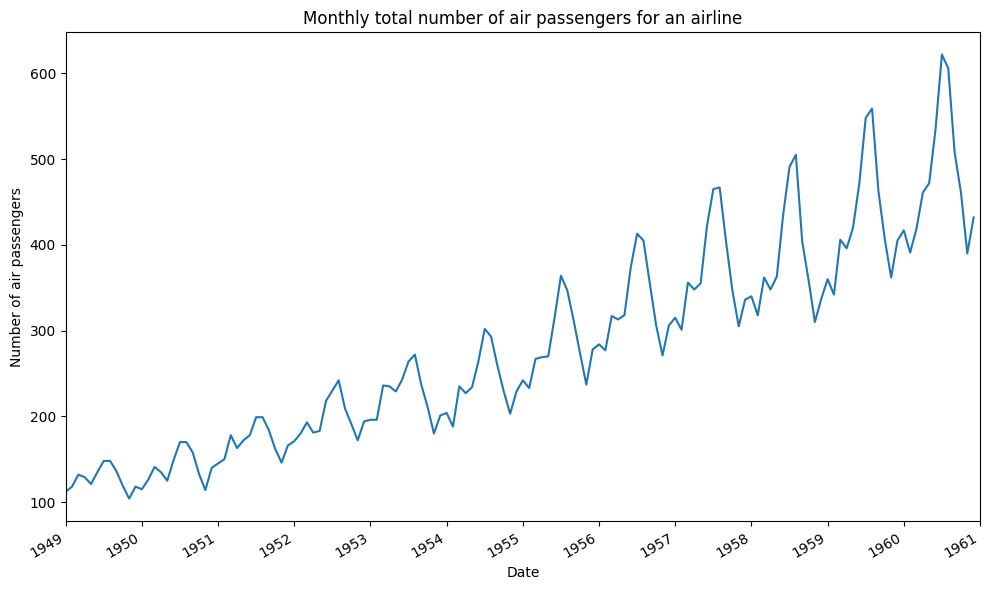

In [29]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(df['Month'], df['Passengers'])
ax.set_xlabel('Date')
ax.set_ylabel('Number of air passengers')
ax.set_title('Monthly total number of air passengers for an airline')
ax.set_xlim(0, 143)

plt.xticks(np.arange(0, 145, 12), np.arange(1949, 1962, 1))

fig.autofmt_xdate()
plt.tight_layout()

*Monthly total number of air passengers for an airline, from January 1949 to
December 1960. You’ll notice a clear seasonal pattern in the series, with peak traffic
occurring toward the middle of each year.*

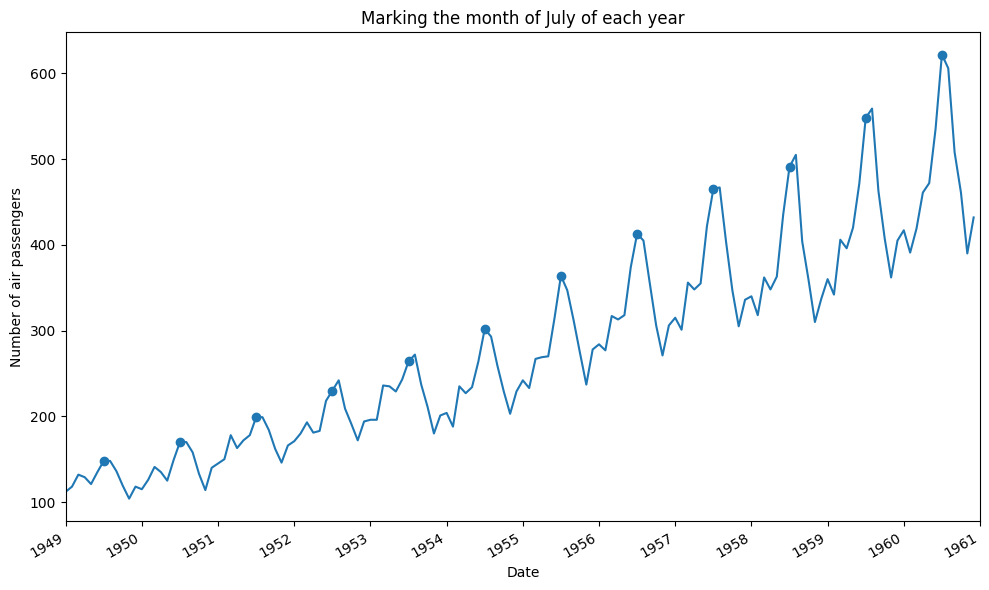

In [35]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(df['Month'], df['Passengers'], markevery=np.arange(6, 145, 12), marker='o')
ax.set_xlabel('Date')
ax.set_ylabel('Number of air passengers')
ax.set_title('Marking the month of July of each year')
ax.set_xlim(0, 143)

plt.xticks(np.arange(0, 145, 12), np.arange(1949, 1962, 1))

fig.autofmt_xdate()
plt.tight_layout()

*Marking the month of July of each year. You can see how the month of July
has the highest number of air passengers. Therefore, it would make sense if July of the
following year also saw the highest number of air passengers in the year. That kind of
information is captured by the seasonal parameters P, D, Q, and m of the
SARIMA(p,d,q)(P,D,Q)m model.*

## Identifying seasonal patterns in a time series

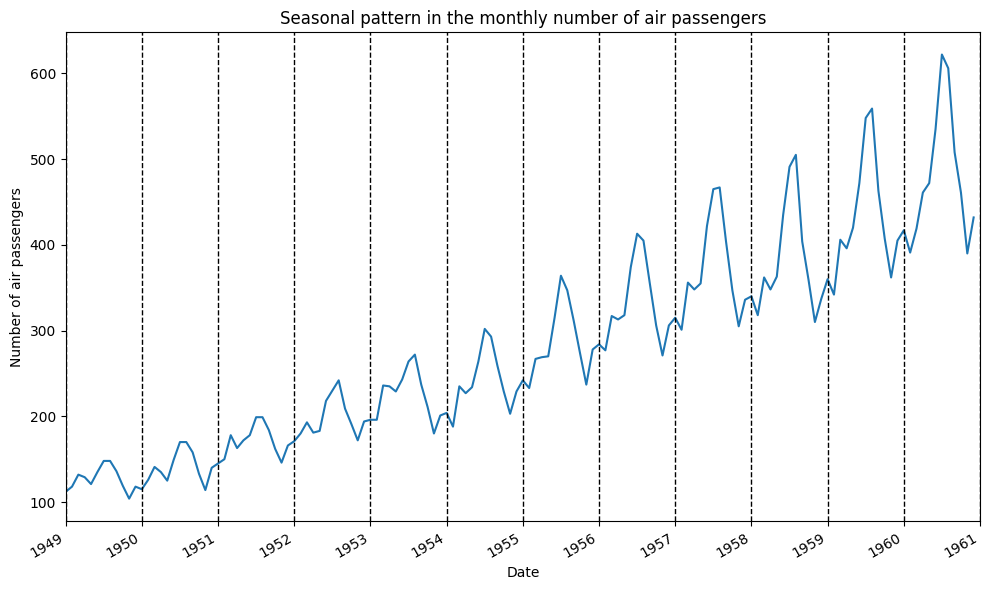

In [41]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(df['Month'], df['Passengers'])
for i in np.arange(0, 145, 12):
    ax.axvline(x=i, linestyle='--', color='black', linewidth=1)
ax.set_xlabel('Date')
ax.set_ylabel('Number of air passengers')
ax.set_title('Seasonal pattern in the monthly number of air passengers')
ax.set_xlim(0, 143)

plt.xticks(np.arange(0, 145, 12), np.arange(1949, 1962, 1))

fig.autofmt_xdate()
plt.tight_layout()

*Highlighting the seasonal pattern in the monthly number of air passengers.
The dashed vertical lines separate periods of twelve months. We can clearly see how a
peak occurs in the middle of each year, and there is a very similar pattern for the
beginning and end of each year. This observation is usually enough to determine that the
dataset is seasonal.*